In [2]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

from goto.globe.plot import GlobePlotMpl

# Tangente externe et interne

Les deux solutions s'obtiennent à partir de la même équation

## hypothèses

On rappelle les definitions de :
* $N_z$, le vecteur normal du plan equatorial incliné de $\theta$ autour de $O_x$
* $U_x$, le centre du cercle de centre R
* $M_x$, la projection de $U_x$ sur le plan $N_z$

## Calcul simple

In [3]:
theta, psi, R = sympy.symbols('theta psi R')

In [4]:
# Nz = g3d.Vector(-sympy.sin(theta), 0, sympy.cos(theta))
# Nx = g3d.Vector(sympy.cos(theta), 0, sympy.sin(theta))
# Ny = g3d.Vector(0, 1, 0)
Nz = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta))
Ny = g3d.Vector(0, sympy.cos(theta), sympy.sin(theta))
Nx = g3d.Vector(1, 0, 0)

In [5]:
Ux = g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0)

In [6]:
Mx = Ux.project(Nz)

In [7]:
psi_equ = Ux.angle_to(Mx).simplify()
psi_equ

acos(sqrt(-sin(psi)**2*sin(theta)**2 + 1))

In [8]:
psi_sol = sympy.solve(psi_equ - R, psi)
psi_sol[0]

pi - asin(sqrt(sin(R)**2)/sin(theta))

La solution trouvée par sympy n'est pas optimale, on propose la nouvelle forme suivante :

In [9]:
psi_alt = sympy.asin(sympy.sin(R) / sympy.sin(theta))
psi_alt

asin(sin(R)/sin(theta))

<IPython.core.display.Javascript object>


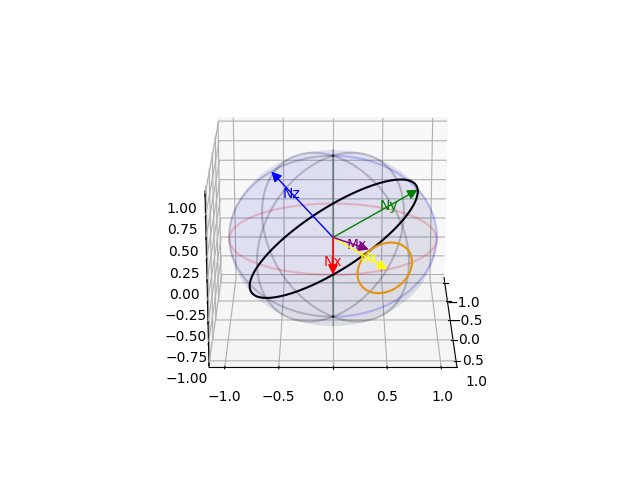

[1.0, 0.0, -0.0] [0.0, 0.8090169943749475, 0.5877852522924731]


In [10]:
m_val = {'theta': math.pi / 5, 'R': 0.3}
m_val['psi'] = float(psi_alt.subs(m_val))

r = Ux.angle_to(Mx)

with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_circle(Ux.subs(m_val), float(r.subs(m_val)), 'orange')
    gpl.add_point(Ux.subs(m_val), 'Ux', 'yellow')
    gpl.add_point(Mx.subs(m_val), 'Mx', 'purple')

## Calcul complet

Les points $A$ et $B$ sont séparés d'un angle $\alpha$ donné. On cherche $\theta$ mais également $\psi_a$ et $\psi_b$, leur position respective.

In [11]:
theta, psi_a, psi_b, Ra, Rb, alpha = sympy.symbols('theta psi_a psi_b R_a R_b alpha')

In [12]:
Ua = g3d.Vector(sympy.cos(psi_a), sympy.sin(psi_a), 0)
Ub = g3d.Vector(sympy.cos(psi_b), sympy.sin(psi_b), 0)

In [13]:
Ma = Ua.project(Nz)
Mb = Ub.project(Nz)

On récupère la solution précédemment calculée pour $\psi$. Et pour éviter de perdre le solveur on remplace le numérateur par $P_a$ et $P_b$.

In [14]:
Pa, Pb = sympy.symbols('P_a P_b')

psi_a_sol = sympy.asin(Pa / sympy.sin(theta))
psi_b_sol = sympy.asin(Pb / sympy.sin(theta))

In [15]:
theta_equ = (psi_b_sol + psi_a_sol) - alpha
theta_equ

-alpha + asin(P_a/sin(theta)) + asin(P_b/sin(theta))

In [16]:
# theta_sol = sympy.solve(theta_equ, theta) # 

since sympy can not solve equation, matlab was used, here is the full script :

	syms Pa Pb theta alpha

	psi_a = asin(Pa / sin(theta))
	psi_b = asin(Pb / sin(theta))

	equ_direct = psi_b + psi_a == alpha

	sol_direct = solve(equ_direct, theta)

	s1_orig = sol_direct(4)
	s2_orig = sol_direct(1)

	s3_orig = Pa^4 - 2 * cos(2*alpha) * Pa^2 * Pb^2 + Pb^4

	% mannually simplified
	s3 = (Pa^2 - Pb^2)^2 + 4*Pa^2*Pb^2*sin(alpha)^2

	s3_check = subs(s3_orig, [Pa, Pb, alpha], [0.4, 0.7, pi/5]) - subs(s3, [Pa, Pb, alpha], [0.4, 0.7, pi/5])

	s4_orig = 2 * Pa * Pb^3 * sin(alpha)^2 * sqrt(1 - sin(alpha)^2)

	% manually simplified
	s4 = 2 * Pa * Pb^3 * sin(alpha)^2 * cos(alpha)

	s4_check = simplify(subs(s4_orig, [Pa, Pb, alpha], [0.4, 0.7, pi/5]) - subs(s4, [Pa, Pb, alpha], [0.4, 0.7, pi/5]))

	s5 = Pa^2 + Pb^2 * sin(alpha)^2 - Pb^2

	s1_d = sin(alpha) * (Pa + Pb * cos(alpha))
	s2_d = sin(alpha) * (Pa - Pb * cos(alpha))

	sx_qn = Pa^4 - Pb^4*sin(alpha)^2 + Pb^4 - 2*Pa^2*Pb^2 + 3*Pa^2*Pb^2*sin(alpha)^2

	s1_q = simplify((sx_qn - s4) / s3)
	s2_q = simplify((sx_qn + s4) / s3)

	s1 = asin(s5 / (s1_d * sqrt(s1_q)))
	s2 = asin(s5 / (s2_d * sqrt(s2_q)))

	% check that simplification is correct

	s1_check = simplify(subs(s1_orig, [Pa, Pb, alpha], [0.4, 0.7, pi/5]) - subs(s1, [Pa, Pb, alpha], [0.4, 0.7, pi/5]))
	s2_check = simplify(subs(s2_orig, [Pa, Pb, alpha], [0.4, 0.7, pi/5]) - subs(s2, [Pa, Pb, alpha], [0.4, 0.7, pi/5]))

In [17]:
theta_1 = sympy.asin(
    ((Pb**2*sympy.sin(alpha)**2 + Pa**2 - Pb**2) / (
        sympy.sin(alpha)*(Pa + Pb*sympy.cos(alpha))* sympy.sqrt(
            (Pa - Pb*sympy.cos(alpha))**2 /
            (Pa**2 - 2*sympy.cos(alpha)*Pa*Pb + Pb**2)
        )
    )).simplify()
).subs({'P_a': sympy.sin(Ra), 'P_b': sympy.sin(Rb)}).simplify()
theta_1

asin((sin(R_a)/sin(alpha) - sin(R_b)/tan(alpha))/sqrt((-sin(R_a) + sin(R_b)*cos(alpha))**2/(sin(R_a)**2 - 2*sin(R_a)*sin(R_b)*cos(alpha) + sin(R_b)**2)))

In [18]:
theta_2 = sympy.asin(
    ((Pb**2*sympy.sin(alpha)**2 + Pa**2 - Pb**2) / (
        sympy.sin(alpha)*(Pa - Pb*sympy.cos(alpha))* sympy.sqrt(
            (Pa + Pb*sympy.cos(alpha))**2 /
            (Pa**2 + 2*sympy.cos(alpha)*Pa*Pb + Pb**2)
        )
    )).simplify()
).subs({'P_a': sympy.sin(Ra), 'P_b': sympy.sin(Rb)}).simplify()
theta_2

asin((sin(R_a)/sin(alpha) + sin(R_b)/tan(alpha))/sqrt((sin(R_a) + sin(R_b)*cos(alpha))**2/(sin(R_a)**2 + 2*sin(R_a)*sin(R_b)*cos(alpha) + sin(R_b)**2)))

In [24]:
m_val = {'R_a': 0.3, 'R_b': 0.2, 'alpha': 0.7}

<IPython.core.display.Javascript object>


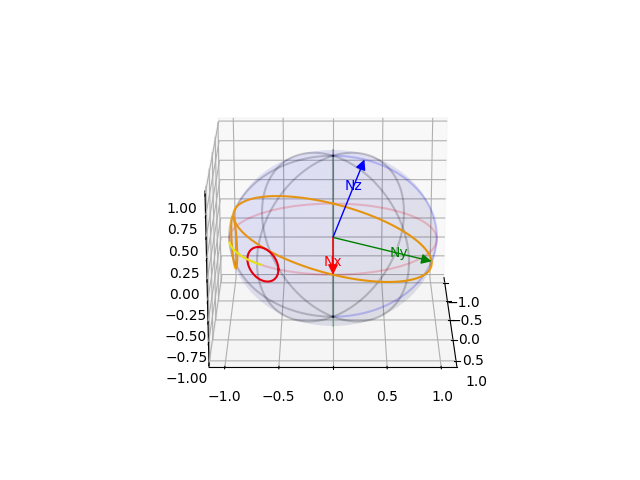

[-1.0, 0.0, 0.0] [0.0, -0.954392211554963, 0.2985557008720931]


In [25]:
with GlobePlotMpl() as gpl :
    m_val['theta'] = float(- theta_1.subs(m_val))
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'orange')
    m_val['psi_a'] = float(sympy.asin(sympy.sin(Ra) / sympy.sin(theta)).subs(m_val))
    m_val['psi_b'] = float(sympy.asin(sympy.sin(Rb) / sympy.sin(theta)).subs(m_val))
    gpl.add_circle(Ua.subs(m_val), float(Ra.subs(m_val)), 'orange')
    gpl.add_circle(Ub.subs(m_val), float(Rb.subs(m_val)), 'red')
    gpl.add_line(Ua.subs(m_val), Ub.subs(m_val), 'yellow')

<IPython.core.display.Javascript object>


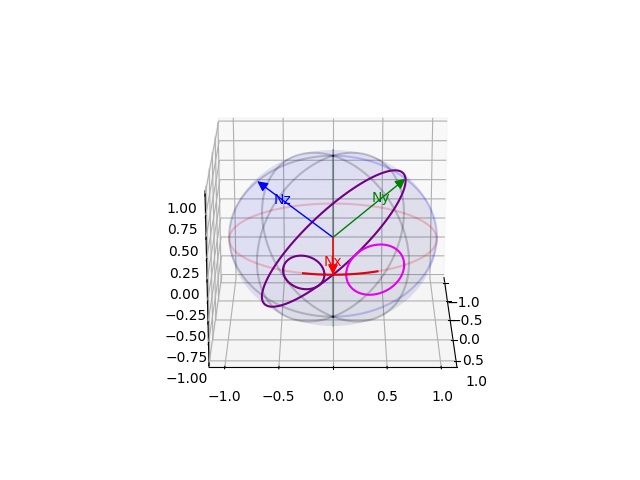

[1.0, 0.0, -0.0] [0.0, 0.6914240292028891, 0.7224491759569266]


In [21]:
with GlobePlotMpl() as gpl :    
    m_val['theta'] = float(theta_2.subs(m_val))
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'purple')
    m_val['psi_a'] = float(sympy.asin(sympy.sin(Ra) / sympy.sin(theta)).subs(m_val))
    m_val['psi_b'] = float(- sympy.asin(sympy.sin(Rb) / sympy.sin(theta)).subs(m_val))
    gpl.add_circle(Ua.subs(m_val), float(Ra.subs(m_val)), 'magenta')
    gpl.add_circle(Ub.subs(m_val), float(Rb.subs(m_val)), 'purple')
    gpl.add_line(Ua.subs(m_val), Ub.subs(m_val), 'r')
